In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
#!jt -t monokai -T -N
#!jt -r
 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('adult.csv')


In [67]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [69]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [70]:
data.shape

(48842, 15)

In [71]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (52, 15)


In [72]:
# Dropping the duplicates 
data = data.drop_duplicates()
print(data.shape)

(48790, 15)


In [11]:
#First lets see how much is the missing data.
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Exploratory data - analysis

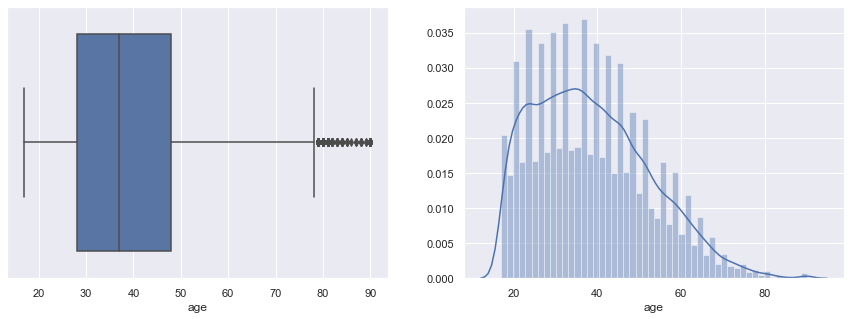

In [74]:

f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(data['age'],ax =axes[0])
sns.distplot(data["age"],ax =axes[1])
plt.show()


In [75]:
# As we can see that its slightly right tailed or positively skewed
print("The mean of age :",data['age'].mean())
print("The median of age :",data['age'].median())
print("The mode of  age :",data['age'].mode())
print(40*'*')
Q3 = data['age'].quantile(0.75)
print("Q3 quartile = ", Q3)
Q1 = data['age'].quantile(0.25)
print("Q1 quartile =", Q1)
IQR = Q3 - Q1
print("IQR =", IQR)
print("Data above Q3 =",(Q3) + 1.5*IQR)
print("Data below Q1 =",(Q1) - 1.5*IQR)

The mean of age : 38.652797704447636
The median of age : 37.0
The mode of  age : 0    36
dtype: int64
****************************************
Q3 quartile =  48.0
Q1 quartile = 28.0
IQR = 20.0
Data above Q3 = 78.0
Data below Q1 = -2.0


In [76]:
data['age'][data['age'] >=85].count()

71

In [30]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


<AxesSubplot:xlabel='workclass', ylabel='count'>

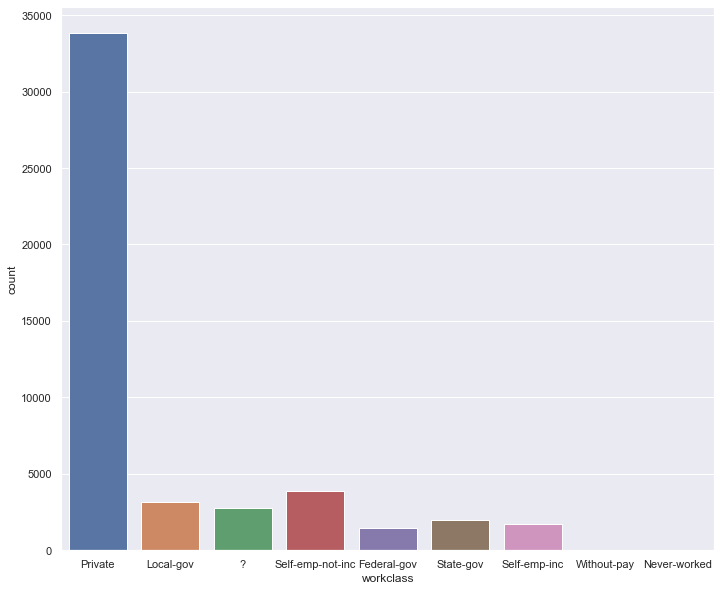

In [77]:

print(data['workclass'].value_counts())
sns.countplot(data['workclass'])

The ? indicates either missing or not known workclass.We have to replace it with unknowns.

HS-grad         32.322197
Some-college    22.264808
Bachelors       16.423447
Masters          5.443738
Assoc-voc        4.222177
11th             3.713876
Assoc-acdm       3.281410
10th             2.846895
7th-8th          1.955319
Prof-school      1.709367
9th              1.549498
12th             1.342488
Doctorate        1.217463
5th-6th          1.039147
1st-4th          0.502152
Preschool        0.166018
Name: education, dtype: float64


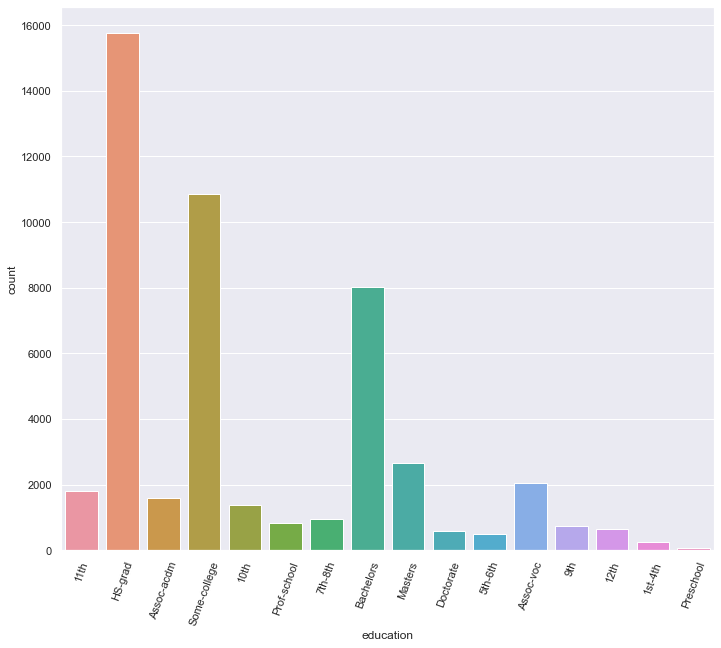

In [78]:
print((data['education'].value_counts()/len(data['education']))*100)
sns.countplot(data['education'])
plt.xticks(rotation = 70)
plt.show()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


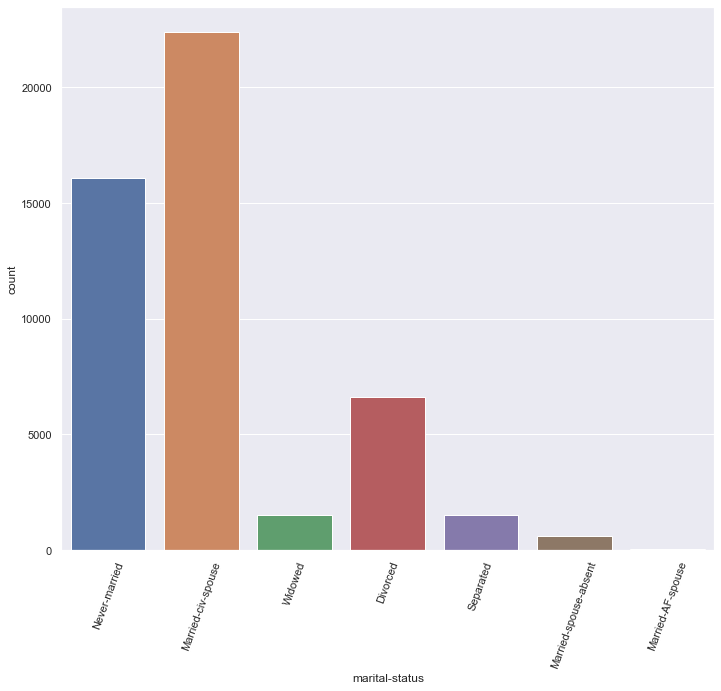

In [79]:
print((data['marital-status'].value_counts()))
sns.countplot(data['marital-status'])
plt.xticks(rotation = 70)
plt.show()

There's no need of this many of status , we can convert these into married or not-married status only.

15


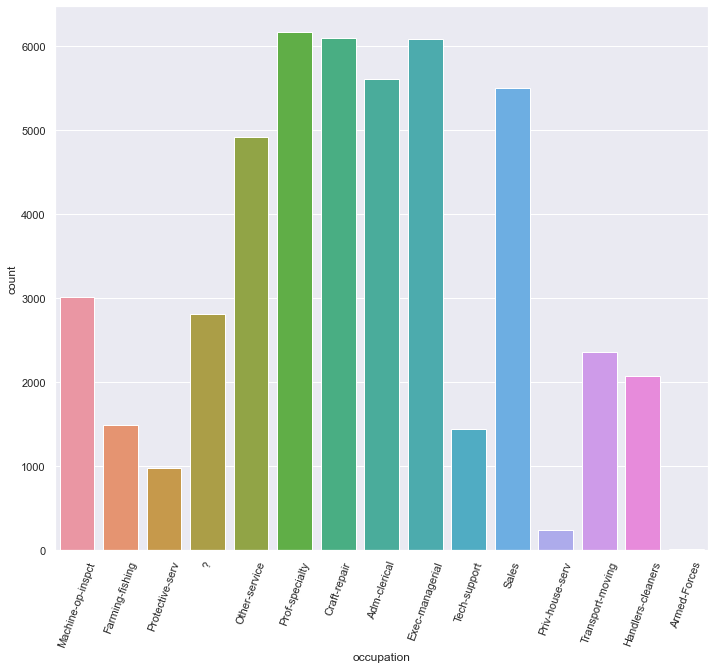

In [80]:
print(data['occupation'].nunique())
sns.countplot(data['occupation'])
plt.xticks(rotation = 70)
plt.show()

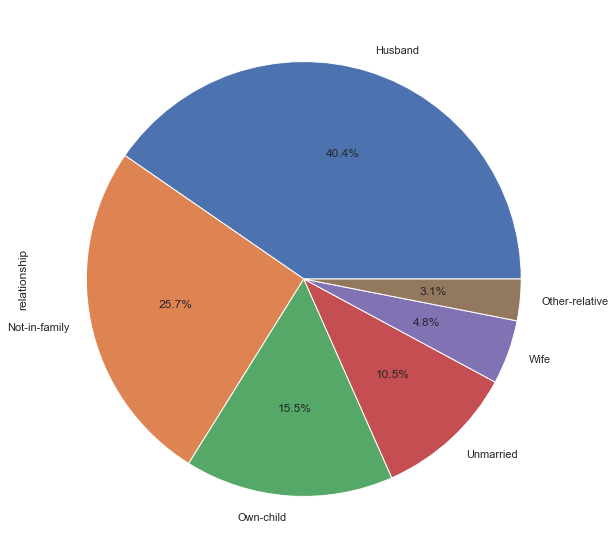

In [81]:
data['relationship'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='race', ylabel='count'>

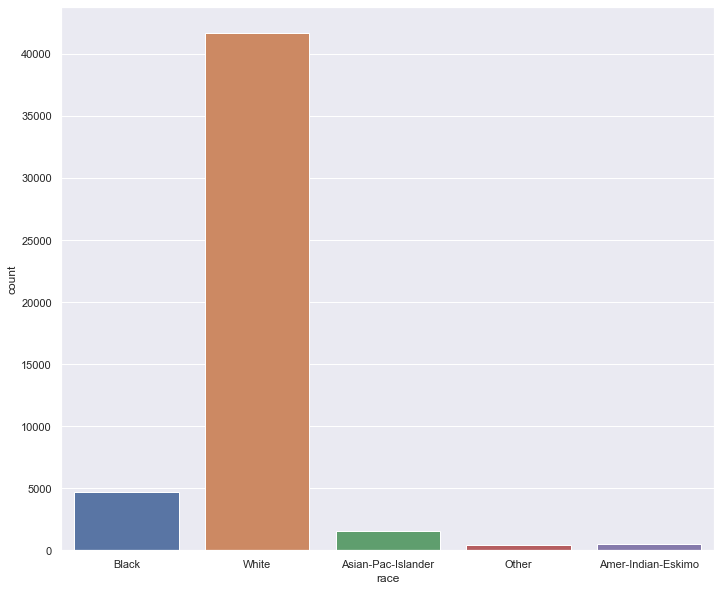

In [82]:
sns.countplot(data['race'])

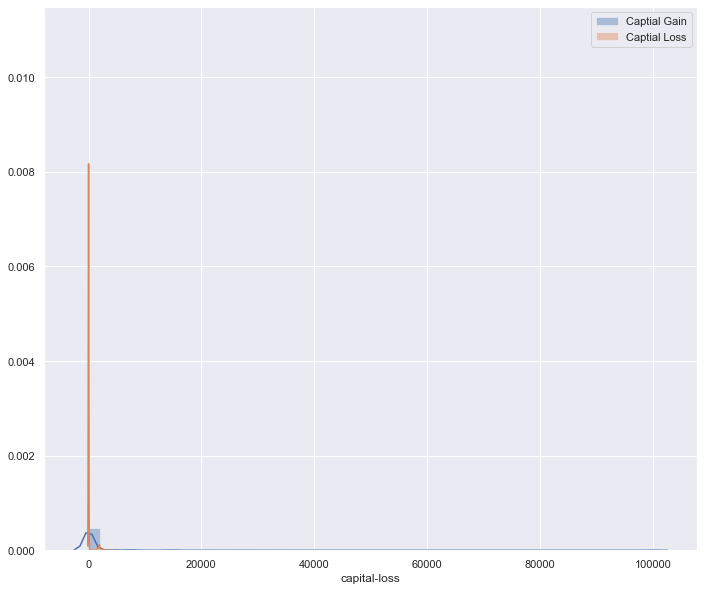

In [83]:
sns.distplot(data["capital-gain"],label='Captial Gain')
sns.distplot(data["capital-loss"],label='Captial Loss')
plt.legend()
plt.show()

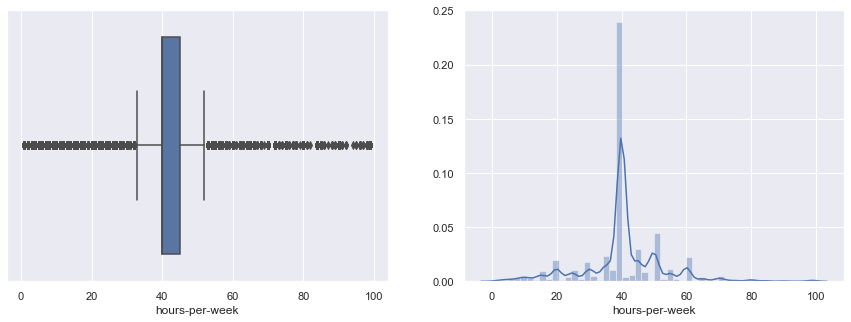

In [84]:
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(data['hours-per-week'],ax =axes[0])
sns.distplot(data["hours-per-week"],ax =axes[1])
plt.show()

In [85]:
# As we can see that its slightly right tailed or positively skewed
print("The mean of hours-per-week :",data['hours-per-week'].mean())
print("The median of hours-per-week :",data['hours-per-week'].median())
print("The mode of  hours-per-week :",data['hours-per-week'].mode())
print(40*'*')
Q3 = data['hours-per-week'].quantile(0.75)
print("Q3 quartile = ", Q3)
Q1 = data['hours-per-week'].quantile(0.25)
print("Q1 quartile =", Q1)
IQR = Q3 - Q1
print("IQR =", IQR)
print("Data above Q3 =",(Q3) + 1.5*IQR)
print("Data below Q1 =",(Q1) - 1.5*IQR)

The mean of hours-per-week : 40.42588645214183
The median of hours-per-week : 40.0
The mode of  hours-per-week : 0    40
dtype: int64
****************************************
Q3 quartile =  45.0
Q1 quartile = 40.0
IQR = 5.0
Data above Q3 = 52.5
Data below Q1 = 32.5


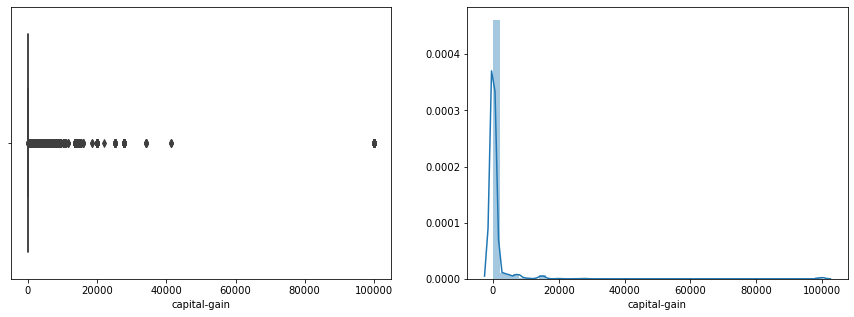

In [31]:
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(data['capital-gain'],ax =axes[0])
sns.distplot(data["capital-gain"],ax =axes[1])
plt.show()

In [33]:
# As we can see that its slightly right tailed or positively skewed
print("The mean of capital-gain :",data['capital-gain'].mean())
print("The median of capital-gain :",data['capital-gain'].median())
print("The mode of  capital-gain :",data['capital-gain'].mode())
print(40*'*')
Q3 = data['capital-gain'].quantile(0.75)
print("Q3 quartile : ", Q3)
Q1 = data['capital-gain'].quantile(0.25)
print("Q1 quartile -", Q1)
IQR = Q3 - Q1
print("IQR :", IQR)
print("Data above Q3 :",(Q3) + 1.5*IQR)
print("Data below Q1 :",(Q1) - 1.5*IQR)

The mean of capital-gain : 1079.0676262233324
The median of capital-gain : 0.0
The mode of  capital-gain : 0    0
dtype: int64
****************************************
Q3 quartile :  0.0
Q1 quartile - 0.0
IQR : 0.0
Data above Q3 : 0.0
Data below Q1 : 0.0


In [86]:
data['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

The last column which is the income , contains whether income <=50k or >50k
We have to check if there's any imbalance.

In [87]:
(data['income'].value_counts()/len(data['income']))*100

<=50K    76.058619
>50K     23.941381
Name: income, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='workclass', ylabel='count'>

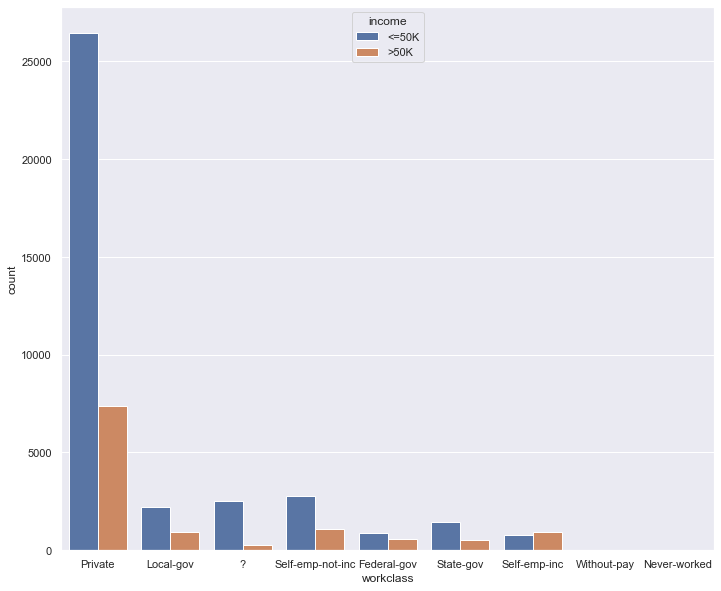

In [88]:
sns.countplot(data['workclass'],hue=data['income'])

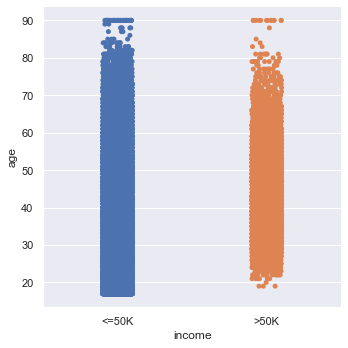

In [89]:
sns.catplot(x = 'income',y = 'age',data=data)

<AxesSubplot:>

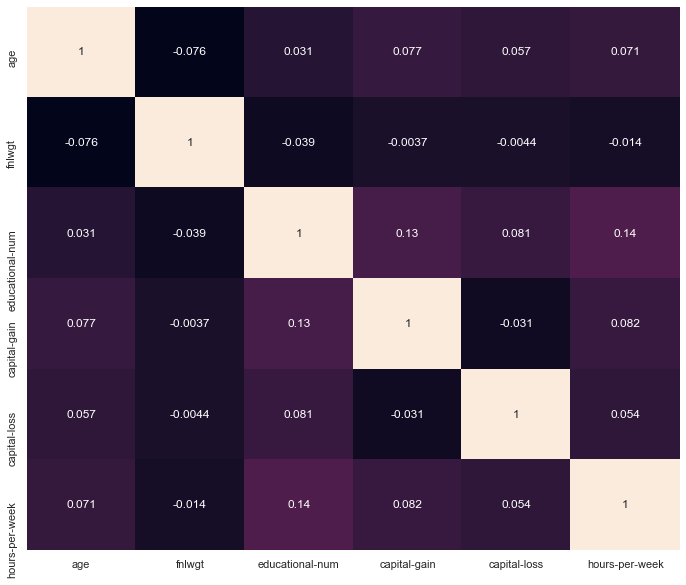

In [90]:
sns.heatmap(data.corr(),annot=True,cbar=False)

<AxesSubplot:xlabel='income', ylabel='count'>

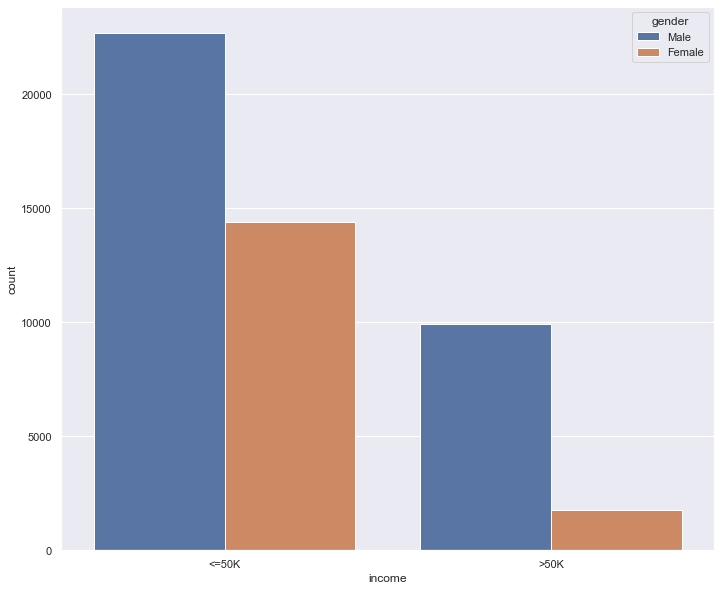

In [91]:
sns.countplot(data['income'],hue=data['gender'])

**Outliers Detection**

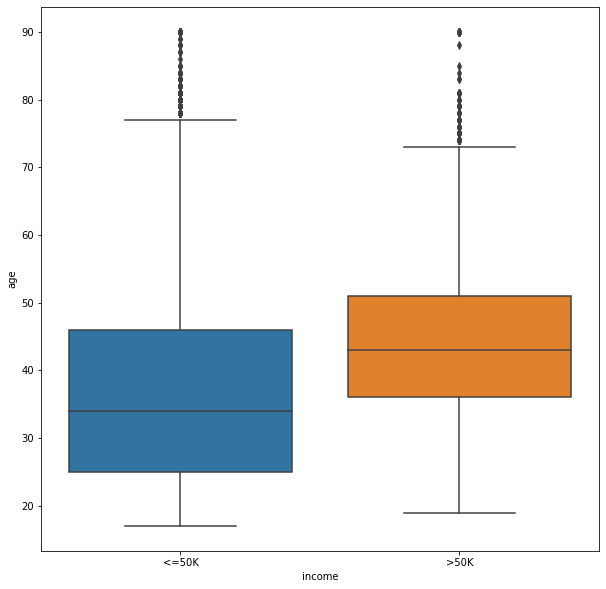

In [3]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [4]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


## Feature Engineering and Model training
 

### Feature Importance and Selection

In [111]:
feature_imp_data = data.copy()

In [112]:

lb = LabelEncoder()
cat_column = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']
for i in cat_column:
    feature_imp_data[i] = lb.fit_transform(feature_imp_data[[i]])

In [113]:
feature_imp_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [ ]:
feature_imp_data['workclass'] = feature_imp_data['workclass'].replace({"?":"unknown"})

In [114]:
X = feature_imp_data.drop(['income'],axis=1)
y = feature_imp_data['income']

In [115]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(criterion ='entropy')
# Training the model
extra_tree_forest.fit(X, y)
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [121]:
extra_tree_score = pd.DataFrame({'Feature':X.columns,'Extra Trees Classifier Score':feature_importance})
extra_tree_score.sort_values('Extra Trees Classifier Score')

,Feature,Extra Trees Classifier Score
8,race,0.015304
13,native-country,0.018433
11,capital-loss,0.025834
9,gender,0.028311
3,education,0.034129
1,workclass,0.043705
6,occupation,0.074174
4,educational-num,0.076989
7,relationship,0.080526
10,capital-gain,0.083017


The least score is for race and native-country , which practically also seems not a very big factor for income.
Hence we will test the accuracy with or without them and check further.

### Logistic Regression Model + Normalize

In [10]:
# BASIC MODEL CREATION
def model_training(X,y):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42,shuffle = True)
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    print("Confusion Matrix :")
    print(confusion_matrix(y_preds,y_test))
    print(40*'*')
    print("Accuracy score for Train :", accuracy_score(model.predict(X_train),y_train))
    print("Accuracy score for Test :", accuracy_score(y_preds,y_test))




In [123]:
raw_data = data.copy()

In [124]:
# CREATE FIRST BASIC MODEL WITH ALL FEATURE
col = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
raw_data = pd.get_dummies(data=data,columns=col,drop_first=True)

In [125]:
raw_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
raw_data['income'] = raw_data['income'].replace({'<=50K':0,'>50K':1})
raw_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [127]:
#Scaling 

mm = MinMaxScaler()
col = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for i in col:
    raw_data[i] = mm.fit_transform(raw_data[[i]])

In [134]:
raw_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
y = raw_data['income']
X = raw_data.drop(['income'],axis=1)


In [131]:
model_training(X,y)

Confusion Matrix :
[[7045 1593]
 [ 434  697]]
****************************************
Accuracy score for Train : 0.7868348987792082
Accuracy score for Test : 0.7925069096120381


This is the basic model accuracy i.e 0.79 on test data using logisitic regression.
Lets try model with selecting best feature.

### Feature Selection + Normalizing + OHE

In [4]:
raw_data_feature_select = data.copy()

In [5]:
col = ['workclass','education','marital-status','occupation','relationship','gender']
raw_data_feature_select = pd.get_dummies(data=data,columns=col,drop_first=True)

raw_data_feature_select['income'] = raw_data_feature_select['income'].replace({'<=50K':0,'>50K':1})

mm = MinMaxScaler()
col = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for i in col:
    raw_data_feature_select[i] = mm.fit_transform(raw_data_feature_select[[i]])

    

In [6]:
raw_data_feature_select.drop(['race','native-country'],axis=1,inplace=True)
raw_data_feature_select.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
y_bf = raw_data_feature_select['income'] #X_best_feature
X_bf = raw_data_feature_select.drop(['income'],axis=1) #y_best_feature

In [11]:
model_training(X_bf,y_bf)

Confusion Matrix :
[[6980  921]
 [ 499 1369]]
****************************************
Accuracy score for Train : 0.8501522790673867
Accuracy score for Test : 0.8546422356433616


####  Best_Feature + Normalizing + XGboost Classifier + Tuned + Cross-Fold Validation

In [27]:
import xgboost 
xgb = xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1)                

folds = 4
param_comb = 10
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
                scoring='accuracy', n_jobs=4, cv=skf.split(X_bf,y_bf), verbose=3, random_state=1001 )

random_search.fit(X_bf, y_bf)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  6.5min finished


[11:48:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002AA55641BF8>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, mis...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsa

In [29]:
print("Accuracy for the Xgboost Model is : ", random_search.best_score_)

Accuracy for the Xgboost Model is :  0.8736127087920553


As we can see that Xgboost model gave the slightly more accuracy than logistics.

### Best feature + normalizing + rearranging data

In [3]:
rearranged_data = data.copy()


In [4]:
print(rearranged_data['marital-status'].unique())
print(40*'*')
print(rearranged_data['workclass'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
****************************************
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [5]:
rearranged_data['marital-status'] = rearranged_data['marital-status'].replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married','Separated','Widowed'],
['not married','married','married','married','not married','not married','not married'])

rearranged_data['workclass'] = rearranged_data['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov','State-gov','Without-pay', 'Never-worked','?'],
['Private','inc','inc','gov','gov','gov','Without-pay','Never-worked','unknown'])

In [6]:
print(rearranged_data['marital-status'].unique())
print(40*'*')
print(rearranged_data['workclass'].unique())

['not married' 'married']
****************************************
['Private' 'gov' 'unknown' 'inc' 'Without-pay' 'Never-worked']


In [7]:
col = ['workclass','education','marital-status','occupation','relationship','gender']
rearranged_data = pd.get_dummies(data=data,columns=col,drop_first=True)

rearranged_data['income'] = rearranged_data['income'].replace({'<=50K':0,'>50K':1})

mm = MinMaxScaler()
col = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
for i in col:
    rearranged_data[i] = mm.fit_transform(rearranged_data[[i]])

In [8]:
rearranged_data.drop(['race','native-country'],axis=1,inplace=True)
rearranged_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
X_re = rearranged_data.drop(['income'],axis=1) #X_rearraged data
y_re = rearranged_data['income'] #y_rearranged_label

In [27]:
import xgboost 
xgb = xgboost.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1)                

folds = 4
param_comb = 10
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
                scoring='accuracy', n_jobs=4, cv=skf.split(X_re,y_re), verbose=3, random_state=1001 )

random_search.fit(X_re, y_re)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  7.5min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000225A2A48F10>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, mis...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tr

In [28]:
random_search.best_score_

0.8736127087920553

Less features same accuracy :)

**LightGBM Model**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, test_size=0.20, random_state=314, stratify=y_re)


**GBM MODEL**

In [19]:
import lightgbm
from sklearn.ensemble import GradientBoostingClassifier               

gb = GradientBoostingClassifier()
folds = 4
param_comb = 10
# A parameter grid for GradientBoost
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}


skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(gb, param_distributions=parameters, n_iter=param_comb, 
                scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 13.6min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000024DE5BD4EB8>,
                   estimator=GradientBoostingClassifier(), n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [20]:
random_search.best_score_

0.8685282697176187

In [23]:
data = ['raw_data','filtered_data + normalization','feature_selection + rearrange +normalization']
accuracy = [0.79,0.856,0.8736]
result = pd.DataFrame({'Model':data,'Accuracy':accuracy})

In [24]:
result

,Model,Accuracy
0,raw_data,0.7900
1,filtered_data + normalization,0.8560
2,feature_selection + rearrange +normalization,0.8736
